In [118]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
 
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
import joblib


### Задание 6.1

На основании датасета предсказания рейтинга красного вина, с которым вы работали в разделе о предобработке данных в предыдущем юните (файл Red.csv ), вам предстоит выполнить следующее:

Добавить в пайплайн, созданный вами в предыдущем юните, обработку столбца 'Region'. Кодирование 'Region' произвести с использованием OrdinalEncoder. Стандартизацию столбца 'Price' и кодирование столбца 'Country' осуществить в соответствии с примером, представленным в юните 5.

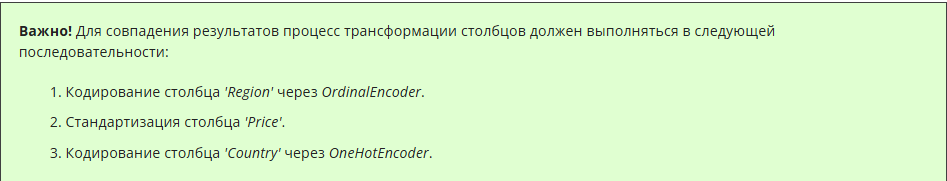

- Обучить пайплайн на тренировочном наборе данных (*файл Red.csv*) и оценить качество модели по метрике RMSE на тестовом наборе (*файл Red_test.csv*).
- Зафиксировать random_state=42.
- Сохранить пайплайн в файл pipeline_wine.pkl.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [94]:
df_wine = pd.read_csv('data/Red.csv')
X = df_wine[['Country', 'Price', 'Region']]
y = df_wine['Rating']
 
ct = make_column_transformer(
    (OrdinalEncoder(), ['Region']),
     (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']),
    )
 
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor(random_state=42))])
pipeline.fit(X,y)
 
df_wine_test = pd.read_csv('data/Red_test.csv')
X_test = df_wine_test[['Country', 'Price', 'Region']]
y_test = df_wine_test['Rating']
y_pred = pipeline.predict(X_test)
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')
 
joblib.dump(pipeline, 'pipeline_vine.pkl')

Качество по RSME: 0.0765


['pipeline_vine.pkl']

### Задание 6.2

Теперь попробуем изменить параметры случайного леса в пайплайне, полученном в предыдущем задании.

Измените параметр n_estimators в случайном лесу со значения по умолчанию до 200 , используя метод set_params.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [103]:
pipeline = pipeline.set_params(rf__n_estimators = 200)

In [105]:
pipeline['rf'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [107]:
pipeline.fit(X,y)
 
y_pred = pipeline.predict(X_test)
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')

Качество по RSME: 0.0761


### Задание 6.3

Теперь попробуем добавить стекинг в качестве модели в пайплайн.

Вам следует выполнить следующее:

- Собрать *StackingRegressor*:

    1. В качестве базовых моделей возьмите ридж-регрессию RidgeCV() и решающее дерево.
    2. В качестве метамодели возьмите случайный лес с настройками (количество базовых моделей 10).
    3. Все базовые модели стекинга модели должны быть с настройками по умолчанию (кроме random_state).

- Зафиксировать random_state=42 (для всех моделей).
- Заменить в пайплайне задачи 6.1 случайный лес на StackingRegressor.
- Обучить модель на тренировочной выборке.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округлённый **до второго знака после запятой.**

In [119]:
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]
 
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)

In [120]:
pipeline_stek = Pipeline([('ct', ct), ('reg', reg )])
pipeline_stek.fit(X,y)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Region']),
                                                 ('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('reg',
                 StackingRegressor(estimators=[('lr', RidgeCV()),
                                               ('dt',
                                                DecisionTreeRegressor(random_state=42))],
                                   final_estimator=RandomForestRegressor(n_estimators=10,
                                                                         random_state=42)))])

In [121]:
y_pred = pipeline_stek.predict(X_test)
print(f'Качество по RSME: {round(rmse(y_test, y_pred),2)}')

Качество по RSME: 0.18
